# Codes for the capstone project

In [2]:
#import common packages for starter

import pandas as pd
import numpy as np
import matplotlib as mpl

import sklearn


In [3]:
import folium

In [60]:
!pip install Shapely

     |████████████████████████████████| 1.8MB 7.9MB/s eta 0:00:01


First, let's import the geojson data of San Francisco (SF)

In [4]:
path="https://data.sfgov.org/api/views/6ia5-2f8k/rows.csv?accessType=DOWNLOAD"

df_sf=pd.read_csv(path)

df_sf

,LINK,the_geom,name
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",MULTIPOLYGON (((-122.49345526799993 37.7835181...,Seacliff
1,NaN,MULTIPOLYGON (((-122.48715071499993 37.7837854...,Lake Street
2,http://www.nps.gov/prsf/index.htm,MULTIPOLYGON (((-122.47758017099994 37.8109931...,Presidio National Park
3,NaN,MULTIPOLYGON (((-122.47241052999993 37.7873465...,Presidio Terrace
4,http://www.sfgate.com/neighborhoods/sf/innerri...,MULTIPOLYGON (((-122.47262578999994 37.7863148...,Inner Richmond
...,...,...,...
112,"http://en.wikipedia.org/wiki/Corona_Heights,_S...",MULTIPOLYGON (((-122.43518796199993 37.7626707...,Corona Heights
113,http://en.wikipedia.org/wiki/Haight-Ashbury,MULTIPOLYGON (((-122.45195776899993 37.7614782...,Ashbury Heights
114,"http://en.wikipedia.org/wiki/Eureka_Valley,_Sa...",MULTIPOLYGON (((-122.43734236799992 37.7623547...,Eureka Valley
115,"http://en.wikipedia.org/wiki/St._Francis_Wood,...",MULTIPOLYGON (((-122.4715693409999 37.73470681...,St. Francis Wood


It is worth to notice that SF has 117 different neighborhoods. We can visualize how these neighborhoods are distributed on the map.

In [5]:
geodatapath="https://data.sfgov.org/api/geospatial/pty2-tcw4?method=export&format=GeoJSON"
sfmap=folium.Map(location=[37.77397,-122.431297], zoom_start=12)

In [6]:
sfmap

In [7]:
sfmap.choropleth(geo_data=geodatapath)
sfmap

117 neighborhoods are a lot for this project. Also Foursquare has a hard time to read back the latitude and longitude of these neighborhoods. Let's combine the neighborhood based on zipcode with a different source.

In [8]:
!pip install lxml
!pip install html5lib
!pip install bs4
import lxml
import html5lib
from bs4 import BeautifulSoup

     |████████████████████████████████| 5.8MB 5.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 8.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [9]:
import requests
response = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm")
soup = BeautifulSoup(response.text, "lxml")
table = soup.find_all("table")
df = pd.read_html(str(table))
df = pd.DataFrame(df[4])

In [10]:
df.drop([22],axis=0,inplace=True)
df

,0,1,2
0,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115


In [11]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [12]:
df.rename(columns = {0:'Zip Code',1:'Neighborhood',2:'Population'}, inplace = True)
df

,Zip Code,Neighborhood,Population
0,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115


In [13]:
df.drop([0],axis=0,inplace=True)
df

,Zip Code,Neighborhood,Population
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115
10,94116,Parkside/Forest Hill,42958


In [14]:
df.reset_index(drop=True,inplace=True)
df.head()

,Zip Code,Neighborhood,Population
0,94102,Hayes Valley/Tenderloin/North of Market,28991
1,94103,South of Market,23016
2,94107,Potrero Hill,17368
3,94108,Chinatown,13716
4,94109,Polk/Russian Hill (Nob Hill),56322


In [15]:
df.dtypes

Zip Code        object
Neighborhood    object
Population      object
dtype: object

In [16]:
convert_dict = {'Zip Code': int,'Population':int} 
  
df = df.astype(convert_dict) 

df.dtypes

Zip Code         int64
Neighborhood    object
Population       int64
dtype: object

We narrow 117 searches to 21 neighborhoods. Now we need to add Latitude and Longitude for each zip code.

In [17]:
path1="https://github.com/ZBerylX-lab/first-repository/blob/master/SF%20zip%20code%20LatLon.xlsx?raw=true"

df_zip=pd.read_excel(path1,header=0)

df_zip.head()

,Zip Code,Latitude,Longitude
0,94102,37.779329,-122.41915
1,94103,37.772329,-122.41087
2,94107,37.766529,-122.39577
3,94108,37.792678,-122.40793
4,94109,37.792778,-122.42188


In [18]:
df_zip.dtypes

Zip Code       int64
Latitude     float64
Longitude    float64
dtype: object

In [19]:
df2=df.merge(df_zip,on="Zip Code")
df2.head()

,Zip Code,Neighborhood,Population,Latitude,Longitude
0,94102,Hayes Valley/Tenderloin/North of Market,28991,37.779329,-122.41915
1,94103,South of Market,23016,37.772329,-122.41087
2,94107,Potrero Hill,17368,37.766529,-122.39577
3,94108,Chinatown,13716,37.792678,-122.40793
4,94109,Polk/Russian Hill (Nob Hill),56322,37.792778,-122.42188


In [20]:
latitude=37.77397
longitude=-122.431297 #pin point to somewhere near SF
map_sf = folium.Map(location = [latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_sf)  
    
map_sf

To answer which neighborhood will be ideal for opening a restaurant. The first thing we need to know is what are already there. 

For easy search in Four Square, we need to add San Francisco, CA in the neighborhood name.

In [21]:
CLIENT_ID="UAE32KCDFHXBTQPWVPGMPE5YL3OMF3HQQXP3YERNMAEW3VUT"
CLIENT_SECRET="0XPBGOHR2MLPXUANI2QJPCTITHA0NB4JWANVDFMWEFXR2TQG"
VERSION="20200426"

print(CLIENT_ID, CLIENT_SECRET, VERSION)

UAE32KCDFHXBTQPWVPGMPE5YL3OMF3HQQXP3YERNMAEW3VUT 0XPBGOHR2MLPXUANI2QJPCTITHA0NB4JWANVDFMWEFXR2TQG 20200426


In [22]:
LIMIT=300
radius=3000 # assume that is how big the area is
neighborhood="Inner Richmond,San Francisco,CA"
section='food'
print(LIMIT, radius, neighborhood)

300 3000 Inner Richmond,San Francisco,CA


In [23]:
Latitude=df2['Latitude'][0]
Longitude=df2['Longitude'][0]

print(Latitude, Longitude) # Let's test it out with one neighborhood

37.779329 -122.41915


In [24]:
#Create a url to obtain the venues for each neighborhood

url = 'https://api.foursquare.com/v2/venues/explore? &client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Latitude,
    Longitude,
    radius,
    LIMIT,
    section)
url

'https://api.foursquare.com/v2/venues/explore? &client_id=UAE32KCDFHXBTQPWVPGMPE5YL3OMF3HQQXP3YERNMAEW3VUT&client_secret=0XPBGOHR2MLPXUANI2QJPCTITHA0NB4JWANVDFMWEFXR2TQG&v=20200426&ll=37.779329,-122.41915&radius=3000&limit=300&section=food'

In [25]:
# Let's test it out with one neighborhood, Inner Richmond 
import requests
results = requests.get(url).json()


In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Saigon Sandwich,Sandwich Place,37.783084,-122.417650
1,a Mano,Italian Restaurant,37.776917,-122.423856
2,Nojo Ramen Tavern,Ramen Restaurant,37.776637,-122.421270
3,Brenda's French Soul Food,Southern / Soul Food Restaurant,37.782896,-122.418897
4,Ananda Fuara,Vegetarian / Vegan Restaurant,37.777693,-122.416353


In [28]:
nearby_venues['categories'].value_counts()

Pizza Place                        10
Bakery                              8
Sushi Restaurant                    5
Seafood Restaurant                  4
Sandwich Place                      4
New American Restaurant             4
Italian Restaurant                  4
Café                                4
Vietnamese Restaurant               4
Mexican Restaurant                  3
Food Truck                          3
Thai Restaurant                     3
Burger Joint                        3
American Restaurant                 3
Japanese Restaurant                 2
Mediterranean Restaurant            2
Southern / Soul Food Restaurant     2
Korean Restaurant                   2
Restaurant                          2
Souvlaki Shop                       2
BBQ Joint                           2
Ramen Restaurant                    2
Deli / Bodega                       2
German Restaurant                   2
Latin American Restaurant           1
French Restaurant                   1
Vegetarian /

We want to see for each neighborhood, how many Chinese restaurants and Asian restaurants are returned. It is worth noting that not all Chinese Restaurant is categorized as Chinese Restaurant. Using Four Square Venue Categories, we can write down a list of Chinese restaurants. Similarly we can get a list of popular Asian restaurant categories as well.

In [29]:
# Generate a list of Chinese Restaurant
Chinese_rest=['Chinese Restaurant','Cantonese Restaurant','Dim Sum Restaurant','Dongbei Restaurant','Fujian Restaurant','Hakka Restaurant','Hunan Restaurant','Peking Duck Restaurant','Shanghai Restaurant','Taiwanese Restaurant','Xinjiang Restaurant']
#Generate a list of other popular Resturant
Asian_rest=['Poke Place','Japanese Restaurant','Korean Restaurant','Vietnamese Restaurant','Sushi Restaurant','Ramen Restaurant','Burmese Restaurant','Hotpot Restaurant','Indonesian Restaurant','Japanese Curry Restaurant','Noodle House','Thai Restaurant']

print(Chinese_rest,Asian_rest)

['Chinese Restaurant', 'Cantonese Restaurant', 'Dim Sum Restaurant', 'Dongbei Restaurant', 'Fujian Restaurant', 'Hakka Restaurant', 'Hunan Restaurant', 'Peking Duck Restaurant', 'Shanghai Restaurant', 'Taiwanese Restaurant', 'Xinjiang Restaurant'] ['Poke Place', 'Japanese Restaurant', 'Korean Restaurant', 'Vietnamese Restaurant', 'Sushi Restaurant', 'Ramen Restaurant', 'Burmese Restaurant', 'Hotpot Restaurant', 'Indonesian Restaurant', 'Japanese Curry Restaurant', 'Noodle House', 'Thai Restaurant']


In [30]:
#write a definition to calculate how many Chinese restaurants and Asian restaurants are there is a given neighborhood. 

def valuecounts(column):
    num_Chinese=0
    num_Asian=0
    total=0
    for category in column:
        total=total+1
        if category in Chinese_rest:
            num_Chinese=num_Chinese+1
        elif category in Asian_rest:
            num_Asian=num_Asian+1
    #print("Chinese restaurant:", num_Chinese,"Asian restaurant:", num_Asian,"total:", total)
    return num_Chinese, num_Asian

In [31]:
#test out the function that we just made

valuecounts(nearby_venues['categories'])

(0, 20)

In [32]:
valuecounts(nearby_venues['categories'])[1]

20

In [33]:
df2.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

In [34]:
def geturl(dataframe):
    CLIENT_ID="UAE32KCDFHXBTQPWVPGMPE5YL3OMF3HQQXP3YERNMAEW3VUT"
    CLIENT_SECRET="0XPBGOHR2MLPXUANI2QJPCTITHA0NB4JWANVDFMWEFXR2TQG"
    VERSION="20200426"
    LIMIT=300
    radius=3000 # assume that is how big the area is
    section='food'
    listofurl=[]
    for i in dataframe.index:
            Latitude=dataframe['Latitude'][i]
            Longitude=dataframe['Longitude'][i]
            listofvenue=[]
            url='https://api.foursquare.com/v2/venues/explore? &client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            Latitude,
            Longitude,
            radius,
            LIMIT,
            section)
            listofurl.append(url)
    return listofurl
            

Now we have a function to get dataframe for food venues in each neighborhood. Now let's test it.

In [35]:
listofurls=geturl(df2)
listofurls[1]

'https://api.foursquare.com/v2/venues/explore? &client_id=UAE32KCDFHXBTQPWVPGMPE5YL3OMF3HQQXP3YERNMAEW3VUT&client_secret=0XPBGOHR2MLPXUANI2QJPCTITHA0NB4JWANVDFMWEFXR2TQG&v=20200426&ll=37.772329,-122.41087&radius=3000&limit=300&section=food'

In [36]:
listofurls[20]

'https://api.foursquare.com/v2/venues/explore? &client_id=UAE32KCDFHXBTQPWVPGMPE5YL3OMF3HQQXP3YERNMAEW3VUT&client_secret=0XPBGOHR2MLPXUANI2QJPCTITHA0NB4JWANVDFMWEFXR2TQG&v=20200426&ll=37.719581,-122.41085&radius=3000&limit=300&section=food'

In [37]:
def getvenue(listurl):
    listofvenue=[]
    for url in listurl:
            results = requests.get(url).json()
            venues = results['response']['groups'][0]['items']
    
            nearby_venues = json_normalize(venues) # flatten JSON

            # filter columns
            filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
            nearby_venues =nearby_venues.loc[:, filtered_columns]

            # filter the category for each row
            nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

            # clean columns
            nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

            listofvenue.append(nearby_venues)
    return listofvenue

In [38]:
listofvenue=getvenue(listofurls)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [39]:
listofvenue[1]

,name,categories,lat,lng
0,The Cake Gallery,Bakery,37.773997,-122.411882
1,Vive La Tarte,Café,37.777012,-122.410899
2,Rintaro,Japanese Restaurant,37.768754,-122.415132
3,Bellota,Spanish Restaurant,37.771759,-122.404886
4,CatHead's BBQ,BBQ Joint,37.770047,-122.415336
...,...,...,...,...
95,The Viking Room,New American Restaurant,37.766685,-122.430210
96,Señor Sisig,Filipino Restaurant,37.757150,-122.421304
97,Loló,Latin American Restaurant,37.757301,-122.421307
98,San Jalisco,Mexican Restaurant,37.758767,-122.416831


In [40]:
listofvenue[20]

,name,categories,lat,lng
0,Fancy Wheat Field Bakery,Bakery,37.727972,-122.403768
1,Banh Mi House,Vietnamese Restaurant,37.727595,-122.403336
2,Tops Cafe BBQ House,Chinese Restaurant,37.730921,-122.405039
3,Piccolo Pete's Cafe,Café,37.712765,-122.400669
4,Estrellita's Pupusas,Salvadoran Restaurant,37.735563,-122.410293
...,...,...,...,...
95,Piccolo Pete's Liquor & Deli,Sandwich Place,37.712670,-122.400768
96,Win Garden,Chinese Restaurant,37.734549,-122.433899
97,Auntie April's Chicken & Waffles,Southern / Soul Food Restaurant,37.736115,-122.390467
98,El Pollo Supremo,Latin American Restaurant,37.715553,-122.441928


In [41]:
len(listofvenue)

21

Now we have a list of dataframe for venues in 5000 meter radius of each neighborhood. Let's create a new pandas dataframe to summarize how many Chinese restaurants and Asian restaurants total in each neighborhood.

In [42]:


    number_of_Chinese_restaurant=[]
    number_of_Asian_restaurant=[]
    for i in range(0,21):
        number_of_Chinese_restaurant.append(valuecounts(listofvenue[i]['categories'])[0])
        number_of_Asian_restaurant.append(valuecounts(listofvenue[i]['categories'])[1])
    
    print('Chinese restaurant:',number_of_Chinese_restaurant)
    print('Asian restaurant:',number_of_Asian_restaurant)


Chinese restaurant: [0, 0, 0, 4, 2, 1, 8, 0, 1, 14, 1, 6, 12, 12, 0, 3, 10, 4, 12, 3, 6]
Asian restaurant: [20, 15, 13, 18, 18, 6, 18, 8, 20, 22, 12, 27, 32, 23, 19, 8, 13, 4, 21, 17, 9]


In [43]:
df2['number of Chinese restaurant']=number_of_Chinese_restaurant
df2['number of Asian restaurant']=number_of_Asian_restaurant

df2.head()

,Zip Code,Neighborhood,Population,Latitude,Longitude,number of Chinese restaurant,number of Asian restaurant
0,94102,Hayes Valley/Tenderloin/North of Market,28991,37.779329,-122.41915,0,20
1,94103,South of Market,23016,37.772329,-122.41087,0,15
2,94107,Potrero Hill,17368,37.766529,-122.39577,0,13
3,94108,Chinatown,13716,37.792678,-122.40793,4,18
4,94109,Polk/Russian Hill (Nob Hill),56322,37.792778,-122.42188,2,18


In [59]:
df2.describe()

,Zip Code,Population,Latitude,Longitude,number of Chinese restaurant,number of Asian restaurant
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,94118.000000,36537.380952,37.762267,-122.437307,4.714286,16.333333
std,9.813256,16641.578568,0.026668,0.030245,4.765951,7.052186
min,94102.000000,13716.000000,37.719581,-122.492650,0.000000,4.000000
25%,94110.000000,26291.000000,37.741797,-122.459700,1.000000,12.000000
50%,94117.000000,33115.000000,37.766529,-122.437360,3.000000,18.000000
75%,94124.000000,42473.000000,37.782029,-122.410870,8.000000,20.000000
max,94134.000000,74633.000000,37.801878,-122.393480,14.000000,32.000000


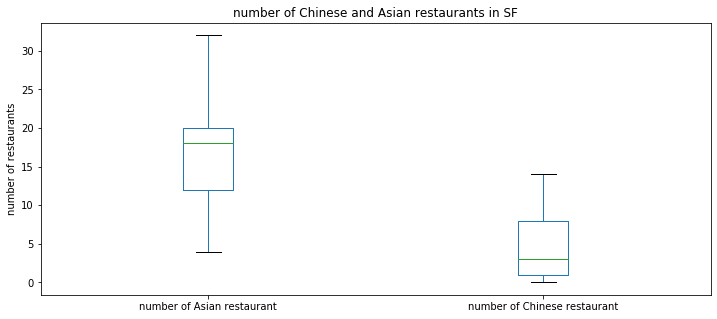

In [57]:
import matplotlib.pyplot as plt
df_box=df2.loc[:,['number of Asian restaurant','number of Chinese restaurant']]


df_box.plot(kind='box',figsize=(12,5))

plt.title('number of Chinese and Asian restaurants in SF')
plt.ylabel('number of restaurants')

plt.show()

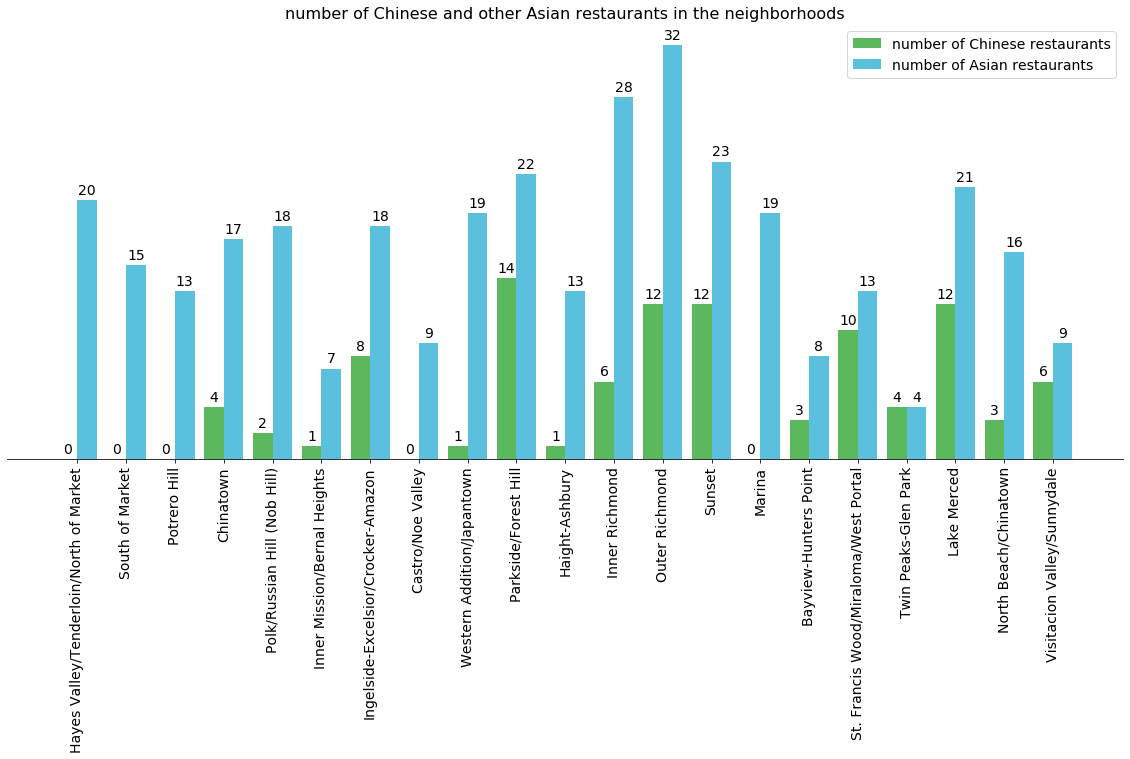

In [153]:
import matplotlib.pyplot as plt
dchinese = df2['number of Chinese restaurant']
dasian = df2['number of Asian restaurant']


ind = np.arange(len(dasian))  # the x locations for the groups
width = 0.8/2  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(ind - 1/2*(width), dchinese, width,
                label='number of Chinese restaurants',color='#5cb85c')
rects2 = ax.bar(ind+1/2*(width), dasian, width,
                label='number of Asian restaurants',color='#5bc0de')
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_yaxis().set_visible(False)

ax.set_title('number of Chinese and other Asian restaurants in the neighborhoods',fontsize=16)

ax.set_xticks(ind)
ax.set_xticklabels(df2['Neighborhood'].values.tolist(),fontsize=14,rotation=90)

ax.legend(fontsize=14)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom',fontsize=14)

autolabel(rects1, "center")
autolabel(rects2, "center")



Now we have the data we want. Now we can use machine learning to cluster the neighborhood based on population, number of Asian restaurants and number of Chinese restaurants. 

In [143]:
#Let's choose which column to use
df3=pd.DataFrame()
df3['Population']=df2['Population']
df3['number of Chinese restaurant']=df2['number of Chinese restaurant']
df3['number of Asian restaurant']=df2['number of Asian restaurant']
df3.head()

,Population,number of Chinese restaurant,number of Asian restaurant
0,28991,0,20
1,23016,0,15
2,17368,0,13
3,13716,4,17
4,56322,2,18


In [144]:
from sklearn.preprocessing import StandardScaler 
df3.set_index('Population')
df3= StandardScaler().fit_transform(df3)

df3


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.46466382, -1.01358694,  0.53388904],
       [-0.83257081, -1.01358694, -0.20372082],
       [-1.18034297, -1.01358694, -0.49876476],
       [-1.40521265, -0.15357378,  0.09132312],
       [ 1.21822588, -0.58358036,  0.2388451 ],
       [ 2.34571457, -0.79858365, -1.38389659],
       [ 2.25156732,  0.70643938,  0.2388451 ],
       [-0.36719155, -1.01358694, -1.08885264],
       [-0.21073103, -0.79858365,  0.38636707],
       [ 0.39534571,  1.99645913,  0.82893298],
       [ 0.13550178, -0.79858365, -0.49876476],
       [ 0.14787823,  0.2764328 ,  1.71406481],
       [ 0.36548213,  1.56645255,  2.30415269],
       [ 1.16711914,  1.56645255,  0.97645495],
       [-0.83952871, -1.01358694,  0.38636707],
       [-0.20734443, -0.36857707, -1.23637461],
       [-0.97985675,  1.13644597, -0.49876476],
       [-0.5320262 , -0.15357378, -1.8264625 ],
       [-0.63091467,  1.56645255,  0.68141101],
       [-0.5979108 , -0.36857707, -0.05619885],
       [ 0.22145963,  0.2764328 , -1.088

In [145]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0,n_init = 12).fit(df3) #repeat 12 times to get a better idea

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 2, 2, 0, 0, 1], dtype=int32)

In [1]:
df2['label']=kmeans.labels_
df2

NameError: name 'kmeans' is not defined

In [158]:
df2.to_csv (r'SF_dataframe.csv', index = False, header=True)

Last, let's visualize how the neighborhood looks like on a map

In [148]:

latitude=37.77397
longitude=-122.431297 #pin point to somewhere near SF
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df2['Latitude'], df2['Longitude'], df2['Neighborhood'], df2['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters